# Project: Investigate a Dataset (Replace this with something more specific!)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Since this dataset has 7 tables, I first explored the tables' features to gain a deeper understanding of what each table entails. The tables in this European Soccer Match dataset include;

    1. Countries    
    2. Leagues      
    3. Matches      
    4. Players
    5. Player Attributes
    6. Teams
    7. Team Attributes

In [76]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data into Dataframes using SQL Queries.

In [77]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
countries_df = pd.read_sql_query("SELECT * from Country", con)
leagues_df = pd.read_sql_query("SELECT * from League", con)
match_df = pd.read_sql_query("SELECT * from Match", con)
player_df = pd.read_sql_query("SELECT * from Player", con)
player_attr_df = pd.read_sql_query("SELECT * from Player_Attributes", con)
team_df = pd.read_sql_query("SELECT * from Team", con)
team_attr_df = pd.read_sql_query("SELECT * from Team_Attributes", con)

In [78]:
countries_df.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [79]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [80]:
match_df.loc[:,:'away_team_goal']

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [81]:
player_df.sample(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
7493,7504,164128,Miguel Rosa,192635,1989-01-13 00:00:00,177.80,148
261,262,667963,Alan Schons,229248,1993-05-24 00:00:00,180.34,163
1806,1809,407747,Christopher Dilo,211011,1994-01-05 00:00:00,187.96,185
1051,1054,174203,Avi Rikan,216696,1988-09-10 00:00:00,170.18,141
2104,2107,188498,Daniel Caligiuri,197083,1988-01-15 00:00:00,182.88,174


In [82]:
player_attr_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [83]:
player_attr_df.columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [84]:
team_df.sample(10)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
279,46087,9910,450.0,RC Celta de Vigo,CEL
100,15623,8721,175.0,VfL Wolfsburg,WOL
61,9539,9827,59.0,Girondins de Bordeaux,BOR
160,26551,8525,1907.0,Willem II,WII
156,26547,8277,1909.0,Vitesse,VIT
226,36735,9764,1888.0,Gil Vicente FC,GV
82,11074,108893,111989.0,AC Arles-Avignon,ARL
85,11822,4087,111271.0,Évian Thonon Gaillard FC,ETG
150,23523,9878,200.0,Pescara,PES
7,8,9998,1747.0,RAEC Mons,MON


In [85]:
team_attr_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [86]:
team_attr_df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

<a id='wrangling'></a>
## Data Wrangling

Transforming the raw European Soccer Data into more appropriate formats for conducting meaningful analysis. Basic Data Analysis was also conducted at this stage to get a better understanding of the merged datasets 

### General Properties
1. Merge Datasets Sensibly to acquire Player Data, Team Data and Match Data separately for analysis.
2. Check Dataset Properties.
3. Understand basic dataset features such as shape, basic info, descripive statistics and more.

In [87]:
# Merge Player Information into a single dataframe using SQL JOINS
player_dataset = pd.read_sql_query(
    """
    SELECT AT.player_api_id AS player_api_id,
    P.player_name AS player_name,
    P.weight AS avg_weight,
    P.height AS avg_height,
    round(avg(AT.overall_rating),2) AS avg_overall,
    round(avg(AT.potential),2) AS avg_potential FROM Player_attributes AT
    LEFT JOIN Player P ON AT.player_api_id = P.player_api_id GROUP BY AT.player_api_id;
    """,con)
player_dataset.sample(10)

,player_api_id,player_name,avg_weight,avg_height,avg_overall,avg_potential
1660,27734,Antonio Di Natale,154,170.18,81.76,82.04
9712,361768,Cafu,185,182.88,67.43,74.57
7294,177652,Danijel Marceta,154,175.26,62.58,68.50
647,23780,Aaron Hughes,154,182.88,73.24,74.68
8363,213653,Charles,165,177.80,71.47,72.06
9365,303999,Matthew Steenvoorden,174,187.96,63.67,70.67
4722,47575,Murray Davidson,152,180.34,67.36,70.92
2859,36093,Jiayi Shao,183,187.96,67.29,72.29
3725,39706,Giuseppe Mascara,146,175.26,72.27,73.77
472,22355,Lorenzo Del Prete,179,180.34,63.92,67.46


In [88]:
# Merging Match Information into a single dataframe
matches_dataset = pd.read_sql_query(
        """
        SELECT C.name AS country_name, L.name AS league_name, M.season AS season, M.date AS game_day,
        home_team.team_long_name AS home_team_name, 
        away_team.team_long_name AS away_team_name,
        M.Home_team_goal AS home_team_goal,
        M.away_team_goal AS away_team_goal,
        M.match_api_id AS match_id FROM Match M

        INNER JOIN Country AS C ON M.country_id = C.id
        INNER JOIN League as L ON M.league_id = L.id
        LEFT JOIN Team AS home_team ON home_team.team_api_id = M.home_team_api_id
        LEFT JOIN Team AS away_team ON away_team.team_api_id = M.away_team_api_id;
        """,con)
matches_dataset.sample(10)

,country_name,league_name,season,game_day,home_team_name,away_team_name,home_team_goal,away_team_goal,match_id
6298,France,France Ligue 1,2012/2013,2012-10-28 00:00:00,SC Bastia,Girondins de Bordeaux,3,1,1216901
11007,Italy,Italy Serie A,2009/2010,2009-10-25 00:00:00,Bari,Lazio,2,0,704522
18432,Portugal,Portugal Liga ZON Sagres,2011/2012,2012-01-29 00:00:00,Vitória Setúbal,S.C. Olhanense,2,3,1042965
19962,Scotland,Scotland Premier League,2009/2010,2009-12-12 00:00:00,Rangers,St. Johnstone FC,3,0,658888
3531,England,England Premier League,2012/2013,2013-04-27 00:00:00,Everton,Fulham,1,0,1229475
6561,France,France Ligue 1,2012/2013,2013-04-27 00:00:00,Stade Brestois 29,Stade Rennais FC,0,2,1217144
19346,Portugal,Portugal Liga ZON Sagres,2014/2015,2014-09-20 00:00:00,FC Penafiel,Vitória Setúbal,2,0,1748757
819,Belgium,Belgium Jupiler League,2011/2012,2011-12-03 00:00:00,KSV Cercle Brugge,KV Kortrijk,1,2,1032819
10521,Italy,Italy Serie A,2008/2009,2009-04-25 00:00:00,Fiorentina,Roma,4,1,539884
22893,Spain,Spain LIGA BBVA,2011/2012,2012-03-26 00:00:00,Granada CF,Sevilla FC,0,3,1051935


In [89]:
# Merging Team Information into a single dataset
team_dataset = team_df.merge(team_attr_df, on = ['team_api_id', 'team_fifa_api_id'], how='inner')
team_dataset.head(5)

,id_x,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,2010-02-22 00:00:00,45,Balanced,NaN,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,2011-02-22 00:00:00,66,Balanced,NaN,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,2012-02-22 00:00:00,53,Balanced,NaN,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,2013-09-20 00:00:00,58,Balanced,NaN,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,2014-09-19 00:00:00,58,Balanced,52.0,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [90]:
team_dataset.drop(columns=["id_y","team_api_id" , "team_fifa_api_id","team_short_name"], inplace=True)

In [91]:
team_dataset.sample(5)

,id_x,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1229,43038,Villarreal CF,2012-02-22 00:00:00,20,Slow,NaN,Little,26,Short,Organised,...,58,Normal,Organised,51,Medium,51,Press,56,Normal,Cover
266,6509,Reading,2011-02-22 00:00:00,49,Balanced,NaN,Little,36,Mixed,Organised,...,55,Normal,Organised,49,Medium,31,Contain,67,Wide,Cover
610,16243,1. FSV Mainz 05,2013-09-20 00:00:00,66,Balanced,NaN,Little,52,Mixed,Organised,...,56,Normal,Organised,48,Medium,65,Press,53,Normal,Cover
500,15618,Hamburger SV,2012-02-22 00:00:00,46,Balanced,NaN,Little,40,Mixed,Organised,...,39,Normal,Organised,55,Medium,47,Press,48,Normal,Cover
1445,49479,FC St. Gallen,2015-09-10 00:00:00,52,Balanced,46.0,Normal,48,Mixed,Organised,...,37,Normal,Organised,40,Medium,36,Press,52,Normal,Cover


In [93]:
# Rename id column effectively
team_dataset.rename(columns={'id_x':'id'}, inplace=True)

__Note__: In the above cells, I merged the 7 tables into 3 unique yet valuable dataframes namely; The Team Dataset, The Matches Played Dataset and The Player Information Dataset.

### Preliminary Dataset Investigations

In [94]:
print(f"There are {matches_dataset.shape[0]} Matches in total in the Matches' Dataset.")
print(f"There are {player_dataset.shape[0]} Players available in the Players' Dataset.")

There are 25979 Matches in total in the Matches' Dataset.
There are 11060 Players available in the Players' Dataset.


In [95]:
# Find the Names of Unique European Leagues Available in this Dataset
print(f"Number of Unique European Leagues Available in Dataset = {len(matches_dataset.league_name.unique())}")
print()
print(f"Names of European Leagues Available in Dataset : \n{matches_dataset.league_name.unique()}")

Number of Unique European Leagues Available in Dataset = 11

Names of European Leagues Available in Dataset : 
['Belgium Jupiler League' 'England Premier League' 'France Ligue 1'
 'Germany 1. Bundesliga' 'Italy Serie A' 'Netherlands Eredivisie'
 'Poland Ekstraklasa' 'Portugal Liga ZON Sagres' 'Scotland Premier League'
 'Spain LIGA BBVA' 'Switzerland Super League']


In [96]:
print(f"Number of Seasons Available: {len(matches_dataset.season.unique())}")
print()
print(f"Seasons Available: {matches_dataset.season.unique()}")

Number of Seasons Available: 8

Seasons Available: ['2008/2009' '2009/2010' '2010/2011' '2011/2012' '2012/2013' '2013/2014'
 '2014/2015' '2015/2016']


In [97]:
# Shape of Datasets
print(f"Shape of Matches' Dataset {matches_dataset.shape}.")
print(f"Shape of Players' Dataset {player_dataset.shape}.")

Shape of Matches' Dataset (25979, 9).
Shape of Players' Dataset (11060, 6).


__Note__: There are a total of __25,979__ Football Matches Available from __11 European Football Leagues__ spanning across __8 Seasons__ in the *Matches Dataset*. As for the *Players' Dataset*, there are a total of __11,060 Player__ information available for analysis

In [92]:
team_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_x                            1458 non-null   int64  
 1   team_long_name                  1458 non-null   object 
 2   date                            1458 non-null   object 
 3   buildUpPlaySpeed                1458 non-null   int64  
 4   buildUpPlaySpeedClass           1458 non-null   object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       1458 non-null   object 
 7   buildUpPlayPassing              1458 non-null   int64  
 8   buildUpPlayPassingClass         1458 non-null   object 
 9   buildUpPlayPositioningClass     1458 non-null   object 
 10  chanceCreationPassing           1458 non-null   int64  
 11  chanceCreationPassingClass      1458 non-null   object 
 12  chanceCreationCrossing          14

In [98]:
# Checking the Match Dataset's basic info
matches_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country_name    25979 non-null  object
 1   league_name     25979 non-null  object
 2   season          25979 non-null  object
 3   game_day        25979 non-null  object
 4   home_team_name  25979 non-null  object
 5   away_team_name  25979 non-null  object
 6   home_team_goal  25979 non-null  int64 
 7   away_team_goal  25979 non-null  int64 
 8   match_id        25979 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.8+ MB


In [99]:
# Checking the Player Dataset's basic info
player_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_api_id  11060 non-null  int64  
 1   player_name    11060 non-null  object 
 2   avg_weight     11060 non-null  int64  
 3   avg_height     11060 non-null  float64
 4   avg_overall    11060 non-null  float64
 5   avg_potential  11060 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 518.6+ KB


In [100]:
# Checking Descriptive Statistics for Matches' Dataset
matches_dataset.describe()

,home_team_goal,away_team_goal,match_id
count,25979.000000,25979.000000,2.597900e+04
mean,1.544594,1.160938,1.195429e+06
std,1.297158,1.142110,4.946279e+05
min,0.000000,0.000000,4.831290e+05
25%,1.000000,0.000000,7.684365e+05
50%,1.000000,1.000000,1.147511e+06
75%,2.000000,2.000000,1.709852e+06
max,10.000000,9.000000,2.216672e+06


In [101]:
# Checking Descriptive Statistics for Players' Dataset
player_dataset.describe()

,player_api_id,avg_weight,avg_height,avg_overall,avg_potential
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,156582.427215,168.380289,181.867445,66.821384,72.090373
std,160713.700624,14.990217,6.369201,6.237697,5.800325
min,2625.000000,117.000000,157.480000,43.000000,51.000000
25%,35555.500000,159.000000,177.800000,62.820000,68.000000
50%,96619.500000,168.000000,182.880000,66.720000,72.000000
75%,212470.500000,179.000000,185.420000,70.952500,76.000000
max,750584.000000,243.000000,208.280000,92.190000,95.230000


In [102]:
team_dataset.describe()

,id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22692.858711,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,15015.159107,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,9547.250000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,20524.500000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,35294.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,50204.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


__Note__: From the Players' Dataset, notice the __average weight was 168.38 Pounds__, __average height was 181.87 centimeters__. The Collective __average overall rating__ for each player was __66.82 Overall__ and the collective __average player potential rating__ was __72.09__ Potential Overall Rating.

As for the Matches Dataset, From all analysed matches, the __home team__ scored an average of __1.5445__ goals while the away team scored an average of __1.1609__ goals. 

This shows that Home Teams often outscore Away Teams in European Football Matches. Therefore we could argur that the Home Advantage does influence a team's ability to score more goals in a match.

### Data Cleaning
In this step, I ensured the dataset was clean and reliable enough to give quality insight into the analysis conducted. The cleaning checklist followed included:

1. Check for Missing Values across the Teams, Players and Matches dataset.
2. Check for Duplicates
3. Fix Datatype Issues


In [103]:
# Checking for missing data across the dataframes
print(f"Null Values in Players' Dataset: {player_dataset.isnull().sum().sum()}")
print(f"Null Values in Teams' Dataset: {team_dataset.isnull().sum().sum()}")
print(f"Null Values in Matches' Dataset: {matches_dataset.isnull().sum().sum()}")

Null Values in Players' Dataset: 0
Null Values in Teams' Dataset: 969
Null Values in Matches' Dataset: 0


In [104]:
# Checking for missing data across the dataframes
print(f"Duplicate Entries in Players' Dataset: {player_dataset.duplicated().sum()}")
print(f"Duplicate Entries in Teams' Dataset: {team_dataset.duplicated().sum()}")
print(f"Duplicate Entries in Matches' Dataset: {matches_dataset.duplicated().sum()}")

Duplicate Entries in Players' Dataset: 0
Duplicate Entries in Teams' Dataset: 1
Duplicate Entries in Matches' Dataset: 0


In [105]:
# Drop Duplicated entries from team data
team_dataset.drop_duplicates(inplace=True)

In [106]:
# Fill missing values from Team Dataset with the Mean value of affected column
mean_stat = team_dataset.buildUpPlayDribbling.mean()
team_dataset.fillna(value=mean_stat, inplace=True)

In [111]:
# Confirming Changes to Null Value Fix
print(f"Missing Values in Team Data: {team_dataset.isnull().sum().sum()}")
print(f"Duplicate Values in Team Data: {team_dataset.duplicated().sum()}")

Missing Values in Team Data: 0
Duplicate Values in Team Data: 0


In [121]:
# Fixing Datatype Issues
# Converting team_dataset.date and match_dataset.game_day

team_dataset['date'] = pd.to_datetime(team_dataset['date'])


In [122]:
matches_dataset['game_day'] = pd.to_datetime(matches_dataset['game_day'])

In [126]:
# confirming datatype changes
matches_dataset.dtypes

country_name              object
league_name               object
season                    object
game_day          datetime64[ns]
home_team_name            object
away_team_name            object
home_team_goal             int64
away_team_goal             int64
match_id                   int64
dtype: object

__Note__: This section saw a lot of data cleaning done, First, check for missing values across the Teams, Players and Matches datasets was performed. The Players and Matches data had __no missing values__ and __no duplicate entries__. Howerver, The Teams' Dataset contained __1 duplicate row__ and __969 Missing values__.

The duplicate row was dropped and the missing values from the __buildUpPlayDribbling__ feature were filled in with the mean/average values of the specified column.

Lastly, there were instances of inaccurate datatypes in place for the Match_Data's __game_day__ column/feature as well as the Team_Data's __date__ which were tagged as `objects` instead of a `datetime` features. Their datatypes were corrected accordingly.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which League Scored the Most Goals in the time period between 2008 and 2016?

To answer this question, I evaluated the Total Number of goals Scored in Each Match(matches_dataset) then group the tally of total goals scored by their specific European Football Leagues.

In [135]:
# New Column to hold total goals
matches_dataset['total_goals'] = matches_dataset['home_team_goal'] + matches_dataset['away_team_goal']
matches_dataset.sample()

,country_name,league_name,season,game_day,home_team_name,away_team_name,home_team_goal,away_team_goal,match_id,total_goals
8840,Germany,Germany 1. Bundesliga,2011/2012,2012-02-04,TSG 1899 Hoffenheim,FC Augsburg,2,2,1030226,4


In [138]:
# Evaluate the Total Goals for each League between 2008 and 2016
league_goals = matches_dataset.groupby('league_name')['total_goals'].sum()
league_goals.sort_values(ascending=False)

league_name
Spain LIGA BBVA             8412
England Premier League      8240
Italy Serie A               7895
Netherlands Eredivisie      7542
France Ligue 1              7427
Germany 1. Bundesliga       7103
Portugal Liga ZON Sagres    5201
Belgium Jupiler League      4841
Scotland Premier League     4804
Poland Ekstraklasa          4656
Switzerland Super League    4166
Name: total_goals, dtype: int64

<AxesSubplot:title={'center':'Total Goals Scored per League 2008 - 2016'}, xlabel='league_name'>

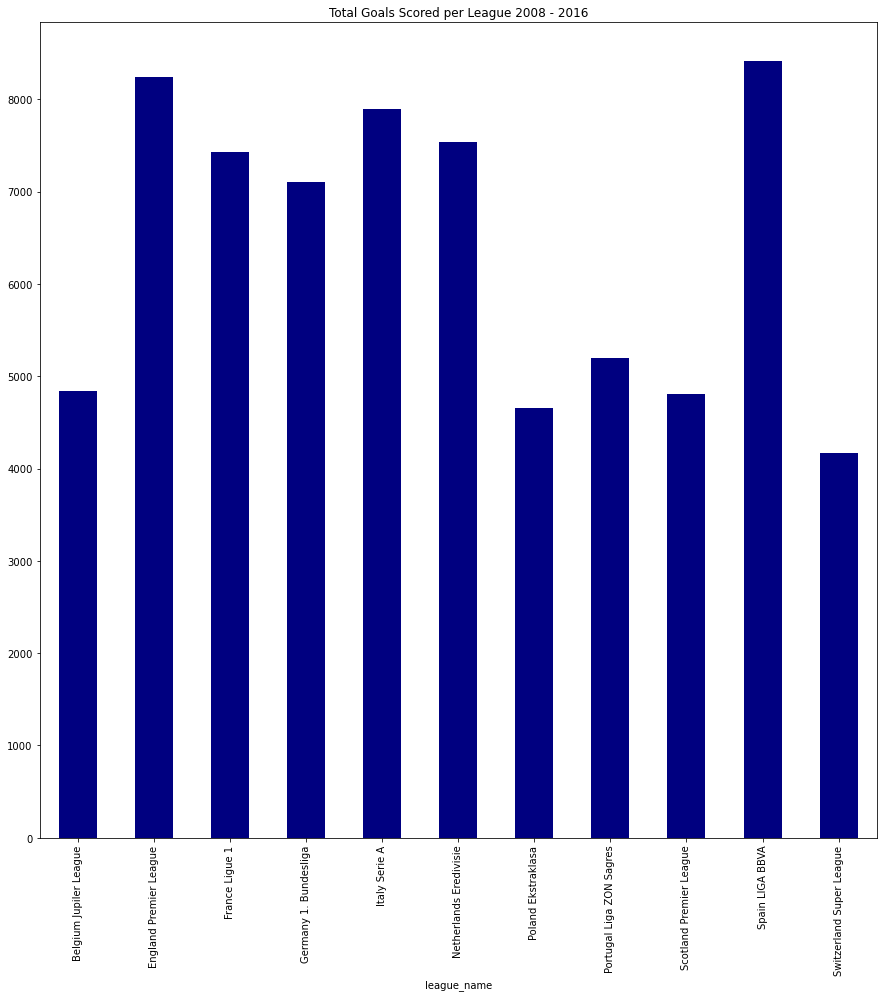

In [144]:
# Visualise Graph
league_goals.plot(kind="bar", figsize=(15,15),
        title="Total Goals Scored per League 2008 - 2016", 
        x="Leagues", y="Total Goals Scored", color="navy")

__Note__: From The Analysis above, Notice that the Spanish League's __Spain LIGA BBVA__ scored the most goals between 2008 - 2016 with __8412 Goals__, followed closely by the __English Premier League__ with __8240 Goals__. The Italian League's __Italy Serie A__ came in third with __7895 Goals__ scored.

Based on the number of Goals scored per league it would be reasonable to conclude that the Spanish, English and Italian leagues are the most competitive leagues in Europe in terms of Total Number of Goals Scored.

### Research Question 2: What teams won the most games?

In [156]:
# Function to evaluate game winners and Update the Matches table
def winner(df):
    home_team = df[0]
    away_team = df[1]
    home_score= df[2]
    away_score = df[3]

    if home_score > away_score:
        winner = home_team
        return winner
    elif home_score < away_score:
        winner = away_team
        return winner
    else:
        return "DRAW"

In [169]:
matches_dataset['winner'] = matches_dataset[['home_team_name', 'away_team_name', 'home_team_goal', 'away_team_goal']].apply(winner, axis=1)

In [170]:
matches_dataset.sample(5)

,country_name,league_name,season,game_day,home_team_name,away_team_name,home_team_goal,away_team_goal,match_id,total_goals,winner
23116,Spain,Spain LIGA BBVA,2012/2013,2012-12-15,Sevilla FC,Málaga CF,0,2,1260311,2,Málaga CF
11180,Italy,Italy Serie A,2010/2011,2011-02-06,Bologna,Catania,1,0,888394,1,Bologna
3487,England,England Premier League,2012/2013,2013-03-17,Wigan Athletic,Newcastle United,2,1,1229428,3,Wigan Athletic
3990,England,England Premier League,2013/2014,2013-10-19,Chelsea,Cardiff City,4,1,1474254,5,Chelsea
14165,Netherlands,Netherlands Eredivisie,2010/2011,2010-09-25,FC Twente,Ajax,2,2,836231,4,DRAW


In [177]:
# Select Match Winners without Draws
matches_new = matches_dataset.query(f"winner != 'DRAW'")
matches_new.sample(5)

,country_name,league_name,season,game_day,home_team_name,away_team_name,home_team_goal,away_team_goal,match_id,total_goals,winner
17559,Poland,Poland Ekstraklasa,2015/2016,2016-03-12,Cracovia,Legia Warszawa,1,2,1994829,3,Legia Warszawa
11033,Italy,Italy Serie A,2010/2011,2010-11-07,Fiorentina,Chievo Verona,1,0,888257,1,Fiorentina
24308,Spain,Spain LIGA BBVA,2015/2016,2016-01-25,Levante UD,UD Las Palmas,3,2,2030359,5,Levante UD
8752,Germany,Germany 1. Bundesliga,2011/2012,2011-10-29,Borussia Mönchengladbach,Hannover 96,2,1,1030013,3,Borussia Mönchengladbach
11595,Italy,Italy Serie A,2011/2012,2012-03-24,Milan,Roma,2,1,1083280,3,Milan


In [184]:
mode = lambda x: x.mode() if len(x) > 2 else np.array(x)

In [255]:
team_goals_per_season = matches_new.groupby(['season'])['winner'].value_counts()
team_goals = team_goals_per_season.to_frame()

In [256]:
team_goals['winner'].sort_values(ascending=False)

season     winner           
2013/2014  Juventus             33
2011/2012  Real Madrid CF       32
2012/2013  FC Barcelona         32
2009/2010  FC Barcelona         31
2013/2014  Celtic               31
                                ..
2012/2013  KSV Cercle Brugge     3
2013/2014  KAA Gent              3
2015/2016  SC Cambuur            3
2013/2014  Lierse SK             2
           Waasland-Beveren      1
Name: winner, Length: 1478, dtype: int64

### Research Question 3: Does a Correlation Exist between Players' Average Overall Rating and their average Potential Rating?

Plot a scatter plot to visualise the relationship between the dataset features

<AxesSubplot:xlabel='avg_overall', ylabel='avg_potential'>

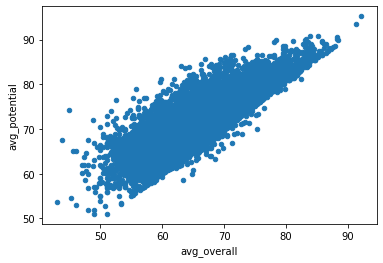

In [251]:
player_dataset.plot(kind='scatter', x='avg_overall', y='avg_potential')

__Note__ Notice that the scatter plot implies a Positive Correlation that as Player overall increases, so does their potential. Therefore players with greater overall rating often have higher potential ratings.

<a id='conclusions'></a>
## Conclusions

From the Research Questions Raised, I found that the Spanish La Liga BBVA was the league with most goals in this period which I would personally highly attribute to the prescence of Two world class players in Cristiano Ronaldo and Lionel Messi during this time.


I also noticed that there was a correlation between a Player's Overall rating and their Overall Potential Rating. This means that the higher a player's overall rating means higher potential rating.


From the Players' Dataset, I notices the __average weight was 168.38 Pounds__, __average height was 181.87 centimeters__. The Collective __average overall rating__ for each player was __66.82 Overall__ and the collective __average player potential rating__ was __72.09__ Potential Overall Rating.As for the Matches Dataset, From all analysed matches, the __home team__ scored an average of __1.5445__ goals while the away team scored an average of __1.1609__ goals. This shows that Home Teams often outscore Away Teams in European Football Matches. Therefore we could argur that the Home Advantage does influence a team's ability to score more goals in a match.


